In [1]:
from connector_cassandra import Interface_db_cassandra, get_db_info
from config import CASSANDRA_HOST
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Conexao com o Cassandra
cassandra_host = CASSANDRA_HOST
keyspace = get_db_info()
db_cassandra = Interface_db_cassandra(keyspace=keyspace, cassandra_host=cassandra_host)  
print(">> Successfully connected to Cassandra")

# Selecao da tabela municipios_cobertura
query = "SELECT * FROM municipios_cobertura;"
municipios_cobertura = db_cassandra.select(query) 

# Conversao para o DataFrame do Pandas
df_municipios_cobertura = pd.DataFrame(municipios_cobertura)   
print(df_municipios_cobertura)
print(df_municipios_cobertura.info())

>> Successfully connected to Cassandra
        id_cobertura   ano  area_coberta  area_municipio  codigo_ibge  \
0               4317  2021     69.738899      799.124084      5221452   
1              62693  2021      0.000000       63.610401      2509156   
2             121478  2021     29.263100       35.913399      4202453   
3             113295  2021      0.000000     1576.215088      4106456   
4             176996  2021      0.000000     1116.201904      1720937   
...              ...   ...           ...             ...          ...   
258790         28249  2021    240.905396     1568.223145      2921203   
258791        246224  2021      6.828700      295.837006      3103751   
258792         56818  2021      0.000000     1264.245483      3111408   
258793        194721  2021      0.000000      271.006012      2112274   
258794        104823  2021     45.532700      194.561707      3157302   

        codigo_nacional  domicilios_cobertos  domicilios_municipio  \
0             

In [2]:
# Localiza na coluna operadora ('Todas','SERCOMTEL','LIGUE', 'ALGAR') e na coluna ano (-1) e exclui
indexNames = df_municipios_cobertura[df_municipios_cobertura['operadora'] == 'Todas' ].index
indexNames1 = df_municipios_cobertura[df_municipios_cobertura['operadora'] == 'SERCOMTEL' ].index
indexNames2 = df_municipios_cobertura[df_municipios_cobertura['operadora'] == 'LIGUE' ].index
indexNames3 = df_municipios_cobertura[df_municipios_cobertura['operadora'] == 'ALGAR'].index
indexAno = df_municipios_cobertura[df_municipios_cobertura['ano'] == '-1'].index
df_municipios_cobertura.drop(indexNames, inplace=True)
df_municipios_cobertura.drop(indexNames1, inplace=True)
df_municipios_cobertura.drop(indexNames2, inplace=True)
df_municipios_cobertura.drop(indexNames3, inplace=True)
df_municipios_cobertura.drop(indexAno, inplace=True)

In [3]:
# Localiza cada região e salva em uma variável
centro_oeste = df_municipios_cobertura.loc[df_municipios_cobertura["regiao"] == 'Centro-oeste']
nordeste = df_municipios_cobertura.loc[df_municipios_cobertura["regiao"] == 'Nordeste']
norte = df_municipios_cobertura.loc[df_municipios_cobertura["regiao"] == 'Norte']
sudeste = df_municipios_cobertura.loc[df_municipios_cobertura["regiao"] == 'Sudeste'] 
sul = df_municipios_cobertura.loc[df_municipios_cobertura["regiao"]== 'Sul']

In [4]:
# Agrupa por operadora e faz um novo indice
dataframe_centro_oeste = centro_oeste.groupby("operadora").sum()
dataframe_centro_oeste.reset_index(inplace = True)
dataframe_nordeste = nordeste.groupby("operadora").sum()
dataframe_nordeste.reset_index(inplace = True)
dataframe_norte = norte.groupby("operadora").sum()
dataframe_norte.reset_index(inplace = True)
dataframe_sudeste = sudeste.groupby("operadora").sum()
dataframe_sudeste.reset_index(inplace = True)
dataframe_sul = sul.groupby("operadora").sum()
dataframe_sul.reset_index(inplace = True)

# # Ordena pelo id_cobertura
# df_municipios_cobertura.sort_values(by=['id_cobertura'], ascending=False, inplace=True)

In [5]:
# Localiza cada operadora e atribui a uma variavel
claro = df_municipios_cobertura.loc[df_municipios_cobertura["operadora"] == 'CLARO'] 
oi = df_municipios_cobertura.loc[df_municipios_cobertura["operadora"] == 'OI']
tim = df_municipios_cobertura.loc[df_municipios_cobertura["operadora"] == 'TIM']
vivo = df_municipios_cobertura.loc[df_municipios_cobertura["operadora"] == 'VIVO']
nextel = df_municipios_cobertura.loc[df_municipios_cobertura["operadora"] == 'NEXTEL']

print(df_municipios_cobertura.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143775 entries, 0 to 258792
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_cobertura          143775 non-null  int64  
 1   ano                   143775 non-null  int64  
 2   area_coberta          143775 non-null  float64
 3   area_municipio        143775 non-null  float64
 4   codigo_ibge           143775 non-null  int64  
 5   codigo_nacional       143775 non-null  int64  
 6   domicilios_cobertos   143775 non-null  float64
 7   domicilios_municipio  143775 non-null  int64  
 8   moradores_cobertos    143775 non-null  float64
 9   moradores_municipio   143775 non-null  int64  
 10  municipio             143775 non-null  object 
 11  nome_uf               143775 non-null  object 
 12  operadora             143775 non-null  object 
 13  regiao                143775 non-null  object 
 14  tecnologia_cobertura  143775 non-null  object 
 15  

In [6]:
# Agrupa por região e atribui a uma variavel. Cria um novo índice
dataframe_claro = claro.groupby("regiao").sum()
dataframe_claro.reset_index(inplace = True)
dataframe_oi = oi.groupby("regiao").sum()
dataframe_oi.reset_index(inplace = True)
dataframe_tim = tim.groupby("regiao").sum()
dataframe_tim.reset_index(inplace = True)
dataframe_vivo = vivo.groupby("regiao").sum()
dataframe_vivo.reset_index(inplace = True)
dataframe_nextel = nextel.groupby("regiao").sum()
dataframe_nextel.reset_index(inplace = True)

In [7]:
# Localiza 0 em domicilios cobertos
df_oi = oi.loc[oi['domicilios_cobertos'] == 0]

# Calcula a diferenca entre a variavel oi e df_oi
print(len(oi)- len(df_oi))

# Localiza 0 em domicilios cobertos e exclui
indexNames = oi[oi['domicilios_cobertos'] == 0 ].index
oi.drop(indexNames , inplace=True)

# Localiza a quantidade de municipios cobertos por operadora
dataframe_oi_municipios = oi.groupby("regiao").count()
print(dataframe_oi_municipios['municipio'])

8840
regiao
Centro-oeste     724
Nordeste        2631
Norte            614
Sudeste         2848
Sul             2023
Name: municipio, dtype: int64


C:\Users\Leila\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
# Localiza 0 em domicilios cobertos
df_vivo = vivo.loc[vivo['domicilios_cobertos'] == 0]

# Calcula a diferenca entre a variavel vivo e df_vivo
print(len(vivo)- len(df_vivo))

# Localiza 0 em domicilios cobertos e exclui
indexNames = vivo[vivo['domicilios_cobertos'] == 0 ].index
vivo.drop(indexNames , inplace=True)

# Agrupa a quantidade de municipios cobertos por regiao
dataframe_vivo_municipios = vivo.groupby("regiao").count()
print(dataframe_vivo_municipios['municipio'])

13871
regiao
Centro-oeste    1053
Nordeste        4040
Norte            875
Sudeste         4734
Sul             3169
Name: municipio, dtype: int64


In [9]:
# Localiza 0 em domicilios cobertos
df_claro = claro.loc[claro['domicilios_cobertos'] == 0]

# Calcula a diferenca entre a variavel claro e df_claro
print(len(claro)- len(df_claro))

# Localiza 0 em domicilios cobertos e exclui
indexNames = claro[claro['domicilios_cobertos'] == 0 ].index
claro.drop(indexNames , inplace=True)

# Agrupa a quantidade de municipios cobertos por regiao
dataframe_claro_municipios = claro.groupby("regiao").count()
print(dataframe_claro_municipios['municipio'])

14066
regiao
Centro-oeste    1143
Nordeste        4332
Norte           1226
Sudeste         4225
Sul             3140
Name: municipio, dtype: int64


In [10]:
# Localiza 0 em domicilios cobertos
df_tim = tim.loc[tim['domicilios_cobertos'] == 0]

# Calcula a diferenca entre a variavel tim e df_tim
print(len(tim)- len(df_tim))

# Localiza 0 em domicilios cobertos e exclui
indexNames = tim[tim['domicilios_cobertos'] == 0 ].index
tim.drop(indexNames , inplace=True)

# Agrupa a quantidade de municipios cobertos por regiao
dataframe_tim_municipios = tim.groupby("regiao").count()
print(dataframe_tim_municipios['municipio'])

12848
regiao
Centro-oeste     801
Nordeste        4074
Norte            639
Sudeste         4302
Sul             3032
Name: municipio, dtype: int64


In [11]:
# Localiza 0 em domicilios cobertos
df_nextel = nextel.loc[nextel['domicilios_cobertos'] == 0]

# Calcula a diferenca entre a variavel nextel e df_nextel
print(len(nextel)- len(df_nextel))

# Localiza 0 em domicilios cobertos e exclui
indexNames = nextel[nextel['domicilios_cobertos'] == 0 ].index
nextel.drop(indexNames , inplace=True)

# Agrupa a quantidade de municipios cobertos por regiao
dataframe_nextel_municipios = nextel.groupby("regiao").count()
print(dataframe_nextel_municipios['municipio'])

3753
regiao
Centro-oeste     271
Nordeste         953
Norte            279
Sudeste         1713
Sul              537
Name: municipio, dtype: int64


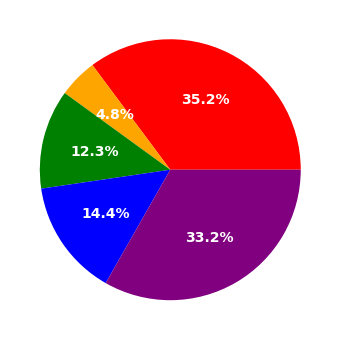

In [12]:
# Cria o gráfico da região Centro-oeste
fig, ax = plt.subplots(figsize = (6,6), subplot_kw=dict(aspect="equal"))
recipe = dataframe_centro_oeste["operadora"]
data = dataframe_centro_oeste["area_coberta"]

cores=['red', 'orange', 'green', 'blue', 'purple']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return '{:.1f}%' .format(pct, absolute)

wedges, texts, autotexts = ax.pie (data, autopct=lambda pct: func(pct, data), textprops=dict(color = "w"), colors=cores)
# ax.legend(wedges, recipe,title="OPERADORAS", loc= "center left", bbox_to_anchor=(1,0,0.5,1),fontsize=12)

plt.setp(autotexts, size = 14, weight="bold")
# ax.set_title("CENTRO-OESTE", size= 20)

plt.show()

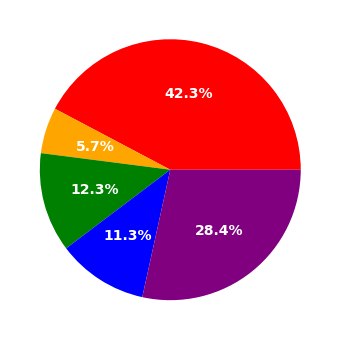

In [13]:
# Cria o gráfico da região Norte
fig, ax = plt.subplots(figsize = (6,6), subplot_kw=dict(aspect="equal"))
recipe = dataframe_norte["operadora"]
data = dataframe_norte["area_coberta"]

cores=['red', 'orange', 'green', 'blue', 'purple']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return '{:.1f}%' .format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color = "w"),  colors=cores)
# ax.legend(wedges, recipe,title="OPERADORAS", loc= "center left", bbox_to_anchor=(1,0,0.5,1),fontsize=12)

plt.setp(autotexts, size = 14, weight="bold")
# ax.set_title("NORTE", size= 20)

plt.show()

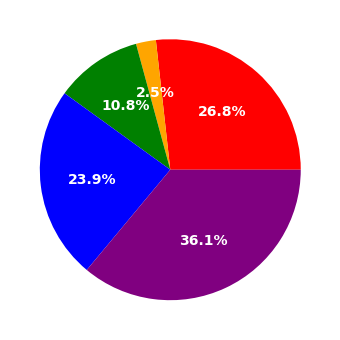

In [14]:
# Cria o gráfico da região Sul
fig, ax = plt.subplots(figsize = (6,6), subplot_kw=dict(aspect="equal"))
recipe = dataframe_sul["operadora"]
data = dataframe_sul["area_coberta"]

cores=['red', 'orange', 'green', 'blue', 'purple']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return '{:.1f}%' .format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color = "w"), colors=cores)
#ax.legend(wedges, recipe,title="OPERADORAS", loc= "center left", bbox_to_anchor=(1,0,0.5,1),fontsize=12)

plt.setp(autotexts, size = 14, weight="bold")
#ax.set_title("SUL", size= 20)

plt.show()

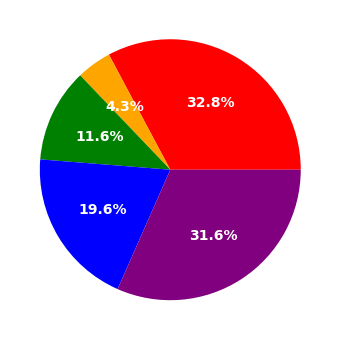

In [15]:
# Cria o gráfico da região Nordeste 
fig, ax = plt.subplots(figsize = (6,6), subplot_kw=dict(aspect="equal"))
recipe = dataframe_nordeste["operadora"]
data = dataframe_nordeste["area_coberta"]

cores=['red', 'orange', 'green', 'blue', 'purple']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return '{:.1f}%' .format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color = "w"), colors=cores)
# ax.legend(wedges, recipe,title="OPERADORAS", loc= "center left", bbox_to_anchor=(1,0,0.5,1),fontsize=12)

plt.setp(autotexts, size = 14, weight="bold")
# ax.set_title("NORDESTE", size= 20)

plt.show()

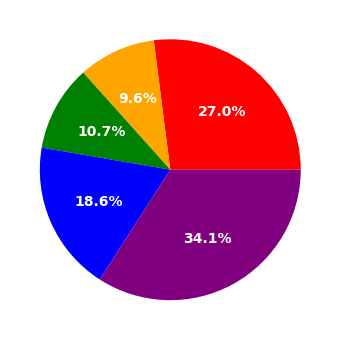

In [16]:
# Cria o gráfico da região Sudeste
fig, ax = plt.subplots(figsize = (6,6), subplot_kw=dict(aspect="equal"))
recipe = dataframe_sudeste["operadora"]
data = dataframe_sudeste["area_coberta"]

cores=['red', 'orange', 'green', 'blue', 'purple']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return '{:.1f}%' .format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color = "w"), colors=cores)
# ax.legend(wedges, recipe,title="OPERADORAS", loc= "center left", bbox_to_anchor=(1,0,0.5,1),fontsize=12)

plt.setp(autotexts, size = 14, weight="bold")
# ax.set_title("SUDESTE", size= 20)

plt.show()

In [17]:
# Localiza o tipo de tecnologia indicado
dois_g = df_municipios_cobertura.loc[df_municipios_cobertura["tecnologia_cobertura"] == '2G']
tres_g = df_municipios_cobertura.loc[df_municipios_cobertura["tecnologia_cobertura"] == '3G']
quatro_g = df_municipios_cobertura.loc[df_municipios_cobertura["tecnologia_cobertura"] == '4G']
# Agrupa por operadora e faz um novo indice
dataframe_dois_g = dois_g.groupby("operadora").sum()
dataframe_dois_g.reset_index(inplace = True) 
dataframe_tres_g = tres_g.groupby("operadora").sum()
dataframe_tres_g.reset_index(inplace = True) 
dataframe_quatro_g = quatro_g.groupby("operadora").sum()
dataframe_quatro_g.reset_index(inplace = True)

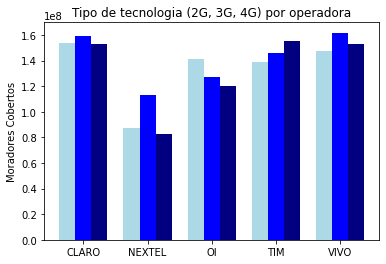

In [18]:
# Localiza nos moradores cobertos cada tecnologia, 2G, 3G e 4G
valores_dois_g = dataframe_dois_g['moradores_cobertos']
valores_tres_g = dataframe_tres_g['moradores_cobertos']
valores_quatro_g = dataframe_quatro_g['moradores_cobertos']

# Cria eixo x para valores_dois_g e valores_tres_g com uma separação de 0.25 entre as barras
x1 =  np.arange(len(valores_dois_g))
x2 = [x + 0.25 for x in x1]
x3 = [x1 + 0.25 for x1 in x2]

# Plota as barras
plt.bar(x1, valores_dois_g, width=0.25, label = '2G', color = 'lightblue')
plt.bar(x2, valores_tres_g, width=0.25, label = '3G', color = 'blue')
plt.bar(x3, valores_quatro_g, width=0.25, label = '4G', color = 'navy')

# Coloca o nome da operadora como eixo x
regiao = dataframe_dois_g['operadora']
plt.xticks([x + 0.25 for x in range(len(valores_dois_g))], regiao)

# inseri uma legenda no gráfico
# plt.legend()
plt.ylabel("Moradores Cobertos")


plt.title("Tipo de tecnologia (2G, 3G, 4G) por operadora")
plt.show()

In [19]:
# Calcula o percentual de moradores cobertos e cria uma nova coluna com os valores
dataframe_dois_g['moradores_cobertos %'] = dataframe_dois_g['moradores_cobertos']/sum(dataframe_dois_g['moradores_cobertos'])*100
dataframe_tres_g['moradores_cobertos %'] = dataframe_tres_g['moradores_cobertos']/sum(dataframe_tres_g['moradores_cobertos'])*100
dataframe_quatro_g['moradores_cobertos %'] = dataframe_quatro_g['moradores_cobertos']/sum(dataframe_quatro_g['moradores_cobertos'])*100

In [20]:
# Ordena a coluna moradores_cobertos_% para a tecnologia 2G
dataframe_dois_g.sort_values(by=['moradores_cobertos %'], ascending=False, inplace=True)
dataframe_dois_g.head(8)

,operadora,id_cobertura,ano,area_coberta,area_municipio,codigo_ibge,codigo_nacional,domicilios_cobertos,domicilios_municipio,moradores_cobertos,moradores_municipio,moradores_cobertos %
0,CLARO,744087346,11246679,393612.691320,8.502579e+06,18669054671,328215,4.727458e+07,57323965,1.539478e+08,189789963,22.994548
4,VIVO,744159562,11246679,402355.020255,8.502579e+06,18669054671,328215,4.552303e+07,57323965,1.476145e+08,189789963,22.048555
2,OI,744234395,11246679,234892.162866,8.502579e+06,18669054671,328215,4.360503e+07,57323965,1.411574e+08,189789963,21.084096
3,TIM,744086013,11246679,172584.043377,8.502579e+06,18669054671,328215,4.296629e+07,57323965,1.391645e+08,189789963,20.786420
1,NEXTEL,744305580,11246679,58572.708419,8.502579e+06,18669054671,328215,2.699839e+07,57323965,8.761295e+07,189789963,13.086381


In [21]:
# Ordena a coluna moradores_cobertos_% para a tecnologia 3G
dataframe_tres_g.sort_values(by=['moradores_cobertos %'], ascending=False, inplace=True)
dataframe_tres_g.head(8)

,operadora,id_cobertura,ano,area_coberta,area_municipio,codigo_ibge,codigo_nacional,domicilios_cobertos,domicilios_municipio,moradores_cobertos,moradores_municipio,moradores_cobertos %
4,VIVO,744234368,11246679,654101.236221,8.502579e+06,18669054671,328215,4.959005e+07,57323965,1.617158e+08,189789963,22.889234
0,CLARO,744085553,11246679,536297.880994,8.502579e+06,18669054671,328215,4.864797e+07,57323965,1.588531e+08,189789963,22.484045
3,TIM,744304499,11246679,288363.824943,8.502579e+06,18669054671,328215,4.490335e+07,57323965,1.458059e+08,189789963,20.637348
2,OI,744232434,11246679,163070.551510,8.502579e+06,18669054671,328215,3.917729e+07,57323965,1.269172e+08,189789963,17.963835
1,NEXTEL,744088046,11246679,151620.733010,8.502579e+06,18669054671,328215,3.495733e+07,57323965,1.132228e+08,189789963,16.025538


In [22]:
# Ordena a coluna moradores_cobertos_% para a tecnologia 4G
dataframe_quatro_g.sort_values(by=['moradores_cobertos %'], ascending=False, inplace=True)
dataframe_quatro_g.head(8)

,operadora,id_cobertura,ano,area_coberta,area_municipio,codigo_ibge,codigo_nacional,domicilios_cobertos,domicilios_municipio,moradores_cobertos,moradores_municipio,moradores_cobertos %
3,TIM,744304955,11246679,424294.768162,8.502579e+06,18669054671,328215,4.770809e+07,57323965,1.552409e+08,189789963,23.397977
0,CLARO,744160028,11246679,513038.519609,8.502579e+06,18669054671,328215,4.694837e+07,57323965,1.530852e+08,189789963,23.073080
4,VIVO,744088134,11246679,504152.351621,8.502579e+06,18669054671,328215,4.711010e+07,57323965,1.529372e+08,189789963,23.050768
2,OI,744159504,11246679,131109.618207,8.502579e+06,18669054671,328215,3.695654e+07,57323965,1.199180e+08,189789963,18.074093
1,NEXTEL,744160759,11246679,69570.679117,8.502579e+06,18669054671,328215,2.551209e+07,57323965,8.229858e+07,189789963,12.404082


In [23]:
# Agrupa por operadora e cria um novo indice
dataframe_maior_operadora = df_municipios_cobertura.groupby("operadora").sum()
dataframe_maior_operadora.reset_index(inplace = True)

In [24]:
# Calcula o percentual de moradores cobertos e cria uma nova coluna com os valores
dataframe_maior_operadora['moradores_cobertos %'] = dataframe_maior_operadora['moradores_cobertos']/sum(dataframe_maior_operadora['moradores_cobertos'])*100

In [25]:
# Ordena a coluna moradores_cobertos %
dataframe_maior_operadora.sort_values(by=['moradores_cobertos %'], ascending=False, inplace=True)
dataframe_maior_operadora.head(8)

,operadora,id_cobertura,ano,area_coberta,area_municipio,codigo_ibge,codigo_nacional,domicilios_cobertos,domicilios_municipio,moradores_cobertos,moradores_municipio,moradores_cobertos %
0,CLARO,3720248659,56233396,1.442949e+06,4.251290e+07,93339973247,1641014,1.428709e+08,286619826,4.658862e+08,948949816,22.843249
4,VIVO,3720731115,56233395,1.560609e+06,4.251289e+07,93345273355,1641075,1.422232e+08,286619825,4.622675e+08,948949815,22.665817
3,TIM,3721013553,56233395,8.852426e+05,4.251289e+07,93345273355,1641075,1.355777e+08,286619825,4.402113e+08,948949815,21.584361
2,OI,3720944143,56233395,5.290723e+05,4.251289e+07,93345273355,1641075,1.197389e+08,286619825,3.879925e+08,948949815,19.023981
1,NEXTEL,3721090744,56233395,2.797641e+05,4.251289e+07,93345273355,1641075,8.746781e+07,286619825,2.831343e+08,948949815,13.882592
5,teste,258796,0,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0,0.000000e+00,0,0.000000
